In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Queueing simulation
## Exponential random draws

In [2]:
def exponential_rng(lam=1.0):  
    """ Generates exponential random number.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random number with given rate.
    """
    return -np.log(np.random.rand()) / lam

## Define events

In [3]:
class Event:
    def __init__(self, current_time, lam=1.0):
        self.current_time = current_time
        self.lam=lam

class Generation(Event):
    
    def __init__(
        self,
        current_time,
        lam,
        T=10
    ):
        super().__init__(current_time, lam)
        self.T = T
        
    def poisson_process(self):
        t = 0
        x = []
        while t <= self.T:
            t += exponential_rng(lam=self.lam)
            if t > self.T:
                break
            x.append(t)
        return x
    

class Arrival(Event):
    def __init__(
        self,
        current_time
    ):
        super().__init__(current_time)
        # uniform
        self.tt = np.random.rand()

    # t^a_i
    def arrival_time(self):
        return self.tt + self.current_time
    
class Departure(Event):
    
    def __init__(
        self,
        current_time
    ):
        super().__init__(current_time)
        
    def service_time(self):
        t = exponential_rng(1)

        # t^d_{i+1}
        return self.current_time + t
    

## Define scenario

In [4]:
class Scenario:
    """ Road scenario
    
    Attributes:
        demand duration (float): Duration of vehicle generation.
        t0 (float): Free-flow travel time.
        lam (float): Entry rate.
        mu (float): Service rate.
    """
    
    def __init__(self, 
                 demand_duration=50.0,
                 t0=1.0,
                 lam=1.0,
                 mu=1.0,
                ):
        self.demand_duration = demand_duration
        self.t0 = t0
        self.lam = lam
        self.mu = mu

## Define simulation procedure

In [5]:
def simulate(scenario):
    """ Implements the simulation procedure.
    
    Keywords:
        scenario (Scenario): Road scenario.
    
    Returns:
        times (list): Event times. 
        queues (list): Queue length over time. 
    """
    lam = scenario.lam
    mu = scenario.mu
    demand_duration = scenario.demand_duration

    times = []
    queues = []
    current_time=0
    ### events generation
    generator = Generation(current_time, lam, T=demand_duration)
    vehicles_generated = generator.poisson_process()
    
    # 0 -> vehicles generated
    # 1 -> vehicle arrival (at the queue)
    # 2 -> vehicle departure
    times = [(x,0) for x in vehicles_generated]
    
    arrivals = []
    
    #t^0
    for vehicle_time in vehicles_generated:   
        arrival = Arrival(vehicle_time)
        arrival_t = arrival.arrival_time()
        arrivals.append(arrival_t)
        times.append((arrival_t, 1))
    
        
    departures = []
    for arrival_time in arrivals:
        departure = Departure(arrival_time)
        departure_time = departure.service_time()
        times.append((departure_time, 2))

    times = sorted(times, key=lambda tup: tup[0])
    queue = 0
    for time, event in times:
        if event == 0:
            queues.append(queue)
            continue
        if event == 1:
            queue += 1
            queues.append(queue)
            continue
        if event == 2:
            if queue > 0:
                queue -= 1
            queues.append(queue)
            continue
            
    times = [x[0] for x in times]
    return times, queues


In [6]:
simulate(Scenario())

([1.2444051036841945,
  1.439833781176732,
  1.8951540952372503,
  1.9369433994349836,
  2.0199535001292377,
  2.2694644573322824,
  2.5252880692877255,
  2.6414200751024715,
  3.0333874843708584,
  3.810667751400691,
  3.8477535723460883,
  4.182156767361098,
  4.219848309439785,
  4.287150552077882,
  4.338003851772051,
  4.390243628179068,
  5.066642360718499,
  6.538252791591398,
  7.0230496609023865,
  7.899320745760204,
  8.048118046952688,
  8.124759563618971,
  8.362964341178664,
  8.965171176890895,
  10.52274632916846,
  11.050840365048138,
  11.173334260272929,
  11.756842665925491,
  11.833774294440063,
  11.985044884641397,
  12.024105827017879,
  12.131710221579347,
  12.260301804836192,
  12.599067657576732,
  12.774783896278636,
  12.853163926471538,
  12.91749398287314,
  13.489603441868024,
  13.518072047042327,
  13.81212989741487,
  13.872288878682802,
  14.065803684174455,
  14.227922340819259,
  14.438213333632245,
  15.069465520940195,
  16.203147106519697,
  17.

In [7]:
arrival = Arrival(0)

In [8]:
arrival.

SyntaxError: invalid syntax (<ipython-input-8-a954607711a4>, line 1)

## Run simulation

In [9]:
times, queues = simulate(Scenario())

## Repeat the simulation multiple times

In [10]:
D = 3
times_queues = [simulate(Scenario()) for d in range(D)]

In [11]:
times_queues

[([2.079341718017336,
   2.971300032880386,
   3.1921761935783484,
   7.122174570808381,
   7.174469698645043,
   7.328048795772675,
   7.43007771255362,
   7.619654327057278,
   8.07768219901426,
   8.66960109446771,
   8.78836411468368,
   8.924182316932786,
   9.097318032064127,
   9.402440351671515,
   9.409253510949519,
   9.953946988705782,
   10.368626262166837,
   10.546061351877592,
   10.784231273957486,
   10.834708990823628,
   10.968187844538079,
   12.92374271594641,
   13.26702238313356,
   13.663709400930292,
   13.710202641675085,
   14.067134617834439,
   14.176627257646597,
   14.416848061839426,
   14.443246627047916,
   14.594323723513337,
   14.832211853264765,
   15.444709487851195,
   15.47377062695523,
   15.72901265622832,
   16.418779106136657,
   17.058593995882116,
   17.10889851469368,
   17.17997826570249,
   17.239719540841467,
   17.264873146003033,
   17.30614793826808,
   17.36712182785571,
   17.53598006434169,
   17.73320234384875,
   17.90446389693

No handles with labels found to put in legend.


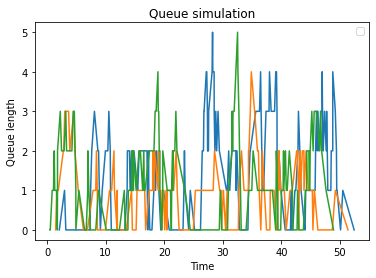

In [12]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

for t, q in times_queues:
    ax.plot(t, q)
ax.set(title='Queue simulation',
       xlabel='Time',
       ylabel='Queue length')
fig.savefig('figure_queue_simulation.pdf', dpi=300)
plt.legend()
plt.show()